# Starting from the basics

In [53]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston

boston = load_boston()

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm

%matplotlib inline

mlab.normpdf is deprycated

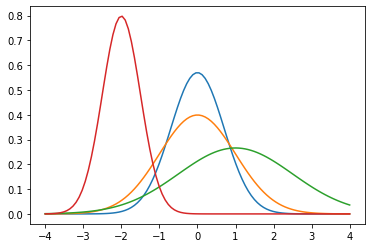

In [55]:
x=np.linspace(-4,4,100) 
for mean,variance in [(0,0.7),(0,1),(1,1.5),(-2,0.5)]:
    plt.plot(x, norm.pdf(x,mean,variance)) 
plt.show()

In [56]:
#inspired in R dataframe render data vectors
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### PDF probability density function

### Mean calculation
pandas DataFrame method

In [57]:
mean_expected_value = dataset['target'].mean()
mean_expected_value

22.532806324110698

NumPy method

In [58]:
np.mean(dataset['target'])

22.532806324110698

### The squared sum of errors
measuring the error produced in predicting the real y values.

In [59]:
squared_errors = pd.Series(mean_expected_value - dataset['target'])**2
SSE = np.sum(squared_errors)
print('Sum of Squared Errors SSE: %01.f'% SSE)

Sum of Squared Errors SSE: 42716


#### Distribution of errors
plot shows  how frequent certain errors are in respect to their values, there is a high density around 0

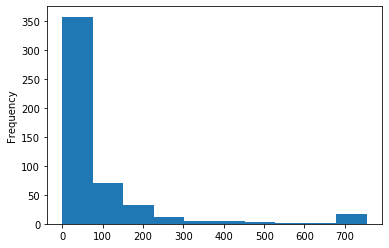

In [60]:
density_plot = squared_errors.plot(kind='hist')

#### The formula for standardizing a variable is as follows:

In [61]:
def standardize(x):
    return (x-np.mean(x)/np.std(x))

### Pearson correlation

In [62]:
            
def covariance(variable_1, variable_2, bias=0):
        observations = float(len(variable_1))
        return np.sum((variable_1 - np.mean(variable_1)) *(variable_2 - np.mean(variable_2))) / (observations-min(bias,1))
    
def standardize(variable):
        return  (variable-np.mean(variable)) / np.std(variable)
    
def correlation(var1,var2,bias=0):
        return covariance(standardize(var1), standardize(var2),bias)


from scipy.stats.stats import pearsonr
print ('Our correlation estimation %0.5f' % (correlation(dataset['RM'],dataset['target'] ) ) )
print ('Correlation from Scipy pearsonr estimation: %0.5f' % pearsonr(dataset['RM'], dataset['target'])[0] )

Our correlation estimation 0.69536
Correlation from Scipy pearsonr estimation: 0.69536


#### Way to estimate if a correlation is relevant or not.

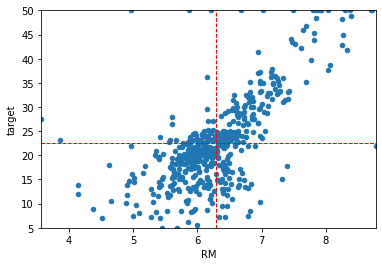

In [63]:
# 
x_range = [ dataset['RM'].min(), dataset['RM'].max()]
y_range = [ dataset['target'].min(), dataset['target'].max() ]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim= y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color='red', linewidth=1 )
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color='red', linewidth=1 )

# Regression with statsmodels

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [66]:
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

In [67]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


#### At this point, we just need to set the initialization of the linear regression calculation: 

In [68]:
linear_regression = sm.OLS(y,X) 

#### Estimation of the regression coefficients, the β - Beta vector

In [69]:
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           2.49e-74
Time:                        20:54:04   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
print(fitted_model.params)
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


# The	coefficient	of	determination

Calculate the sum of squared errors of the mean of the target variable.

In [73]:
mean_sum_squared_errors = np.sum((dataset['target'] - dataset['target'].mean())**2)
regr_sum_squared_errors = np.sum((dataset['target'] - fitted_values)**2)
(mean_sum_squared_errors - regr_sum_squared_errors) / mean_sum_squared_errors

0.4835254559913341

 R-squared correlation 

In [74]:
(pearsonr(dataset['RM'], dataset['target'])[0])**2

0.4835254559913339